In [1]:
import simulate
import market
import withdrawal
import harvesting
import lens
from decimal import Decimal
import pandas
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [2]:
MARKET = market.Returns_US_1871()

In [3]:
def plot(sim, year, lens):
    plt.figure(figsize=(12,6))
    plt.title('Portfolio value')
    s = pandas.Series([lens(n) for n in sim], index=range(year, year+len(sim)))
    g = seaborn.lineplot(data=s)
    seaborn.despine(left=True, bottom=True, offset=20)
    g.axes.yaxis.set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    

[Decimal('168251.0341159199999894191535'),
 Decimal('153311.4806067694767078220472'),
 Decimal('128186.5020819011841394026913'),
 Decimal('94013.11628949849004959505474'),
 Decimal('57866.36084747681030498375942'),
 Decimal('16907.47352121069073892364258'),
 Decimal('236181.0126712904922136238846'),
 Decimal('212345.2043889346884629152943'),
 Decimal('161669.2114821022596245363624'),
 Decimal('106034.2546122016099434413648'),
 Decimal('46782.72867090896941418918724'),
 Decimal('305984.8371852379105740331556'),
 Decimal('242548.8532867647831310989879'),
 Decimal('207626.1146806650141088869402'),
 Decimal('124823.1464182360897549998705'),
 Decimal('37999.67466597626277047437400'),
 Decimal('407955.2067883547124567386242'),
 Decimal('363336.7526450026943534244788'),
 Decimal('264943.1165782958145183985361'),
 Decimal('171070.1690613458157603369238'),
 Decimal('71757.65558116001923899096518'),
 Decimal('493324.0392066479328026447789'),
 Decimal('472640.5426743967792740871280'),
 Decimal('3

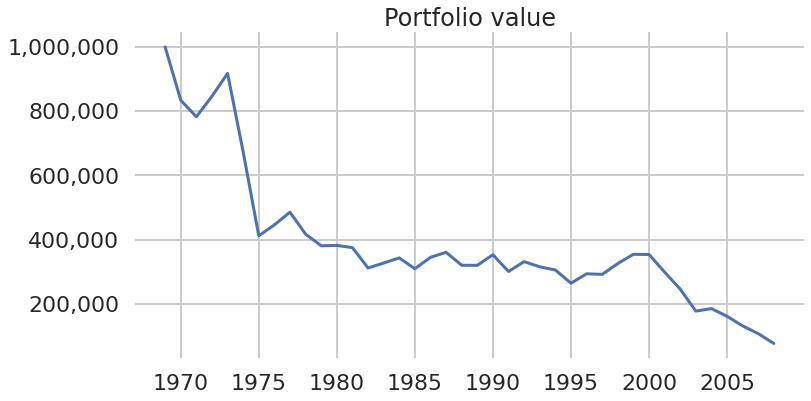

In [25]:
year = 1969
rate = Decimal('0.032')
sim = simulate.withdrawals(MARKET.iter_from(year),
                     harvesting=harvesting.Weiss, portfolio=(800_000, 200_000),
                     withdraw=lambda p, h: withdrawal.ConstantDollar(p, h, rate=rate))
plot(sim, year, lambda n: float(n.portfolio_pre.value_r))
[n.portfolio_post.bonds for n in sim]

In [5]:
#sim[1970 - (1969)].portfolio_pre.value_r
print(sim[0].portfolio_post.value_r)
print(sim[1].portfolio_pre.value_r)

764862.4709718288085584919651
764862.4709718288085584919651


Decimal('1119093.845940873438425442870')

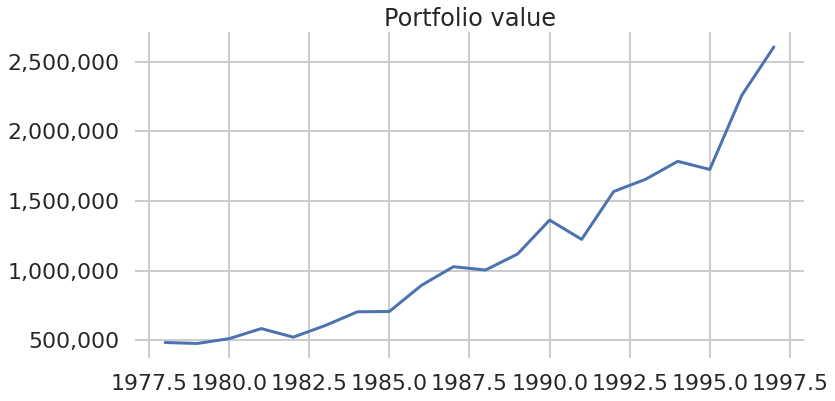

In [6]:
year = 1978
rate = Decimal(0)
portfolio = sim[year - 1969].portfolio_pre
sim2 = simulate.withdrawals(MARKET.iter_from(year),
                            portfolio=(portfolio.value_r, 0), # gets rebalanced for us
                            years=20,
                     harvesting=harvesting.N_80_RebalanceHarvesting,
                     withdraw=lambda p, h: withdrawal.ConstantDollar(p, h, rate=rate))
plot(sim2, year, lambda n: float(n.portfolio_pre.value_r))
sim2[10].portfolio_post.value_r

In [7]:
s = simulate.calc_lens(harvesting.N_80_RebalanceHarvesting,
                   lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('0.042')),
                   45,
                   lens.calc_success
                  )

In [8]:
len(s[s == False]) / len(s)

0.1553398058252427

In [9]:
s75 = simulate.calc_lens(harvesting.make_rebalancer(.75),
                   lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('0.04')),
                   30,
                   lens.calc_years_sustained
                  )
s100 = simulate.calc_lens(harvesting.make_rebalancer(1.0),
                   lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('0.04')),
                   30,
                   lens.calc_years_sustained
                  )

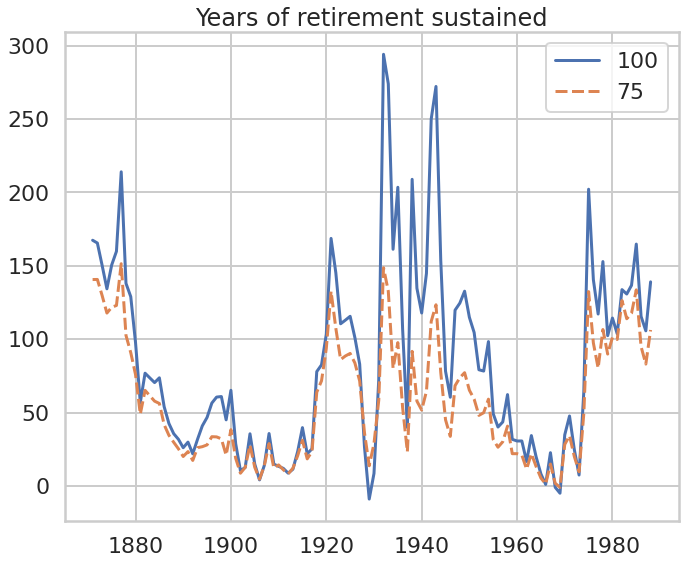

In [10]:
plt.figure(figsize=(11,9))
plt.title(f'Years of retirement sustained')
seaborn.lineplot(data=pandas.DataFrame(data={'75': s75.astype(float), '100': s100.astype(float)}))

75: 59321.28538982177 73825.41356442717, 100: 61211.6710864839 80056.06119137025


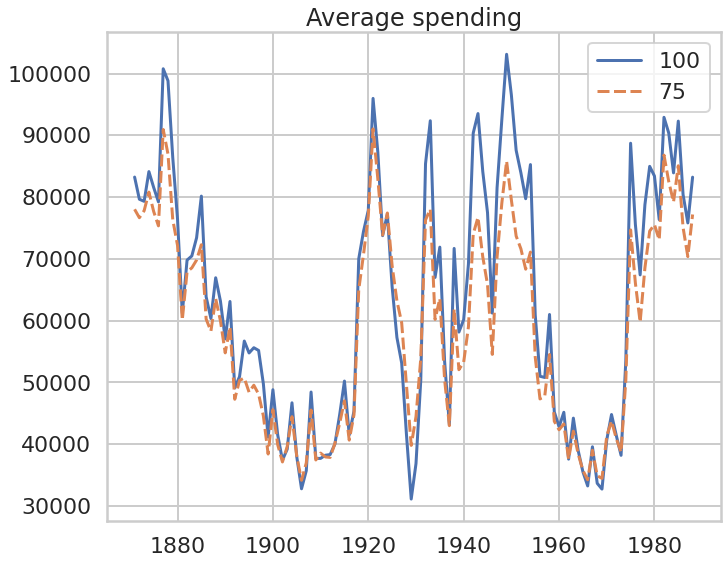

In [11]:
s75 = simulate.calc_lens(harvesting.make_rebalancer(.75),
                   withdrawal.VPW,
                   30,
                   lens.calc_cew
                  )
s100 = simulate.calc_lens(harvesting.make_rebalancer(1.0),
                   withdrawal.VPW,
                   30,
                   lens.calc_cew
                  )
plt.figure(figsize=(11,9))
plt.title(f'Average spending')
seaborn.lineplot(data=pandas.DataFrame(data={'75': s75.astype(float), '100': s100.astype(float)}))
print(f'75: {s75.median()} {s75.astype(float).quantile(.75)}, 100: {s100.median()} {s100.astype(float).quantile(.75)}')